# Correlation Analysis of Statistics to Distance Score

In [1]:
import sqlite3
import pandas as pd


def get_definition(connection):
    cursor = connection.cursor()
    get_query = '''SELECT definitions.model_id, unique_word, word, sentence, paragraph, sum_distance
    FROM statistics, definitions
    WHERE statistics.definition_id = definitions.id'''
    cursor.execute(get_query)
    definitions = cursor.fetchall()

    return definitions

In [14]:

db_path = '../database/drone_definitions.db'
connection = sqlite3.connect(db_path)
definition = get_definition(connection)
definition_df = pd.DataFrame(definition, columns=['model_id', 'unique_word', 'word', 'sentence', 'paragraph', 'sum_distance'])
connection.close()

In [5]:
definition_df

,model_id,unique_word,word,sentence,paragraph,sum_distance
0,1,34,50,3,1,6.832258
1,1,43,54,4,1,7.022258
2,1,28,34,3,1,7.613726
3,1,41,55,3,1,8.231961
4,1,41,58,4,1,7.334737
...,...,...,...,...,...,...
1235,2,73,107,6,1,7.362482
1236,2,93,145,7,3,6.212524
1237,2,93,126,5,1,6.958857
1238,2,88,124,6,1,7.755896


In [6]:
definition_df.corr()

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,1.000000,0.058588,-0.033090,-0.124836,-0.141180,-0.243552
unique_word,0.058588,1.000000,0.981497,0.901995,0.860568,0.206165
word,-0.033090,0.981497,1.000000,0.932229,0.896023,0.234854
sentence,-0.124836,0.901995,0.932229,1.000000,0.921713,0.288271
paragraph,-0.141180,0.860568,0.896023,0.921713,1.000000,0.260383
sum_distance,-0.243552,0.206165,0.234854,0.288271,0.260383,1.000000


In [15]:
chatgpt = definition_df[definition_df.model_id == 1]
chatgpt

,model_id,unique_word,word,sentence,paragraph,sum_distance
0,1,34,50,3,1,6.832258
1,1,43,54,4,1,7.022258
2,1,28,34,3,1,7.613726
3,1,41,55,3,1,8.231961
4,1,41,58,4,1,7.334737
...,...,...,...,...,...,...
243,1,31,46,3,1,6.634167
244,1,26,32,3,1,6.175738
245,1,26,45,3,1,7.329491
246,1,39,54,4,1,7.009418


In [20]:
chatgpt.corr('pearson')

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,NaN,NaN,NaN,NaN,NaN,NaN
unique_word,NaN,1.000000,0.962268,0.875875,NaN,0.093966
word,NaN,0.962268,1.000000,0.900484,NaN,0.081256
sentence,NaN,0.875875,0.900484,1.000000,NaN,0.101723
paragraph,NaN,NaN,NaN,NaN,NaN,NaN
sum_distance,NaN,0.093966,0.081256,0.101723,NaN,1.000000


In [17]:
chatsonic = definition_df[definition_df.model_id == 2]
chatsonic

,model_id,unique_word,word,sentence,paragraph,sum_distance
744,2,73,112,5,1,7.471429
745,2,79,108,4,1,6.974098
746,2,85,115,5,1,7.601340
747,2,78,109,6,1,7.673025
748,2,83,118,5,2,7.003832
...,...,...,...,...,...,...
921,2,109,170,7,3,7.506845
922,2,83,131,6,1,7.248594
923,2,65,107,6,1,6.902369
924,2,99,168,7,2,6.912083


In [19]:
chatsonic.corr('pearson')

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,NaN,NaN,NaN,NaN,NaN,NaN
unique_word,NaN,1.000000,0.894215,0.665565,0.721120,0.067322
word,NaN,0.894215,1.000000,0.770328,0.766536,0.034623
sentence,NaN,0.665565,0.770328,1.000000,0.638893,0.072592
paragraph,NaN,0.721120,0.766536,0.638893,1.000000,0.025285
sum_distance,NaN,0.067322,0.034623,0.072592,0.025285,1.000000


In [21]:
claude = definition_df[definition_df.model_id == 3]
claude

,model_id,unique_word,word,sentence,paragraph,sum_distance
248,3,152,258,10,9,7.587350
249,3,201,356,19,8,8.084081
250,3,173,312,22,10,8.040212
251,3,163,276,24,9,8.446103
252,3,157,262,21,8,8.391221
...,...,...,...,...,...,...
491,3,147,274,19,7,7.607853
492,3,172,292,17,10,6.708330
493,3,26,28,3,1,10.663545
494,3,140,263,17,7,8.124236


In [22]:
claude.corr()

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,NaN,NaN,NaN,NaN,NaN,NaN
unique_word,NaN,1.000000,0.931074,0.749365,0.660624,-0.132293
word,NaN,0.931074,1.000000,0.756602,0.644914,-0.156221
sentence,NaN,0.749365,0.756602,1.000000,0.638474,0.015288
paragraph,NaN,0.660624,0.644914,0.638474,1.000000,-0.057182
sum_distance,NaN,-0.132293,-0.156221,0.015288,-0.057182,1.000000


In [23]:
gptturbo = definition_df[definition_df.model_id == 7]
gptturbo

,model_id,unique_word,word,sentence,paragraph,sum_distance
496,7,94,133,7,1,7.809781
497,7,58,82,4,2,7.282032
498,7,72,92,4,2,7.492856
499,7,80,104,5,2,6.629016
500,7,70,106,5,1,7.633876
...,...,...,...,...,...,...
739,7,84,118,5,1,6.969790
740,7,73,107,5,2,6.115862
741,7,65,82,6,1,6.810652
742,7,97,170,9,2,6.642167


In [24]:
gptturbo.corr()

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,NaN,NaN,NaN,NaN,NaN,NaN
unique_word,NaN,1.000000,0.923670,0.574198,0.516086,-0.253919
word,NaN,0.923670,1.000000,0.640548,0.529682,-0.225528
sentence,NaN,0.574198,0.640548,1.000000,0.393081,-0.058421
paragraph,NaN,0.516086,0.529682,0.393081,1.000000,-0.254487
sum_distance,NaN,-0.253919,-0.225528,-0.058421,-0.254487,1.000000


In [25]:
gpt4 = definition_df[definition_df.model_id == 8]
gpt4

,model_id,unique_word,word,sentence,paragraph,sum_distance
926,8,74,93,4,1,6.958289
927,8,91,127,4,2,6.708335
928,8,55,64,5,1,7.699139
929,8,81,108,5,2,6.957346
930,8,71,105,5,1,7.381220
...,...,...,...,...,...,...
1169,8,72,105,5,1,6.918437
1170,8,86,124,6,2,6.084926
1171,8,100,130,5,2,7.100780
1172,8,85,116,5,2,6.702826


In [26]:
gpt4.corr()

,model_id,unique_word,word,sentence,paragraph,sum_distance
model_id,NaN,NaN,NaN,NaN,NaN,NaN
unique_word,NaN,1.000000,0.927056,0.574746,0.611429,-0.078115
word,NaN,0.927056,1.000000,0.583124,0.597766,-0.073248
sentence,NaN,0.574746,0.583124,1.000000,0.445419,0.087229
paragraph,NaN,0.611429,0.597766,0.445419,1.000000,-0.156814
sum_distance,NaN,-0.078115,-0.073248,0.087229,-0.156814,1.000000


In [15]:
definition_df = definition_df.iloc[:, 1:]

In [16]:
definition_df = definition_df.rename(columns={'unique_word': 'UNQ', 'word': 'WRD', 'sentence': 'SNT', 'paragraph': 'PRG', 'sum_distance': 'DST'})

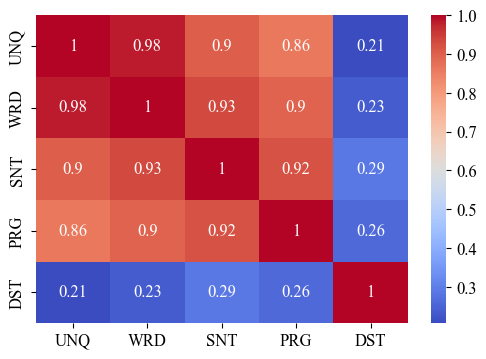

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 12

# Calculate the correlation matrix
correlation_matrix = definition_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
# plt.title('Correlation Heatmap')

plt.savefig('../analysis/visualization/correlation_analysis.pdf')

# Display the plot
plt.show()